In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Mean


In [ ]:
a=[2,4,6,8]
print("a: %s np.mean(a): %s" % (str(a), np.mean(a) ) )


### Sensitive to outliers


In [3]:
a = [1,1,1,1,1000] 
print(np.mean(a))

200.8


### How to deal with that?
Use the harmonic mean.

In [4]:
from scipy import stats
a = [1,1,1,1,1000] 
print(stats.hmean(a))


1.24968757811


# Median
Sort the values an dtake the value in the middle


In [6]:
a = [1,2,3,4,5]
print("Median(a): %s " % np.median(a))
b = [1,2,3,4,5, 6]
print("Median(b) = (3+4) / 2 =  %s " % np.median(b))

Median(a): 3.0 
Median(b) = (3+4) / 2 =  3.5 


# Standard Deviation

In [141]:
# Load the iris dataset
df = pd.read_csv('../data/iris.csv')
# calculate with Numpy
print("Standard Deviation (Numpy)  %0.4f" % np.std(df['sepal_length'])  )

# calculate with Pandas
print("Standard Deviation (Pandas) %0.4f" % df['sepal_length'].std())


Standard Deviation (Numpy)  0.8253
Standard Deviation (Pandas) 0.8281


# Correlation
http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html

In [144]:
# df[['sepal_length', 'petal_length']].corr()
df.corr()


,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.109369,0.871754,0.817954
sepal_width,-0.109369,1.000000,-0.420516,-0.356544
petal_length,0.871754,-0.420516,1.000000,0.962757
petal_width,0.817954,-0.356544,0.962757,1.000000


# Correlation plot

/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/seaborn/linearmodels.py:1283: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/seaborn/linearmodels.py:1349: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


/Users/aperrier/anaconda/envs/py34/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


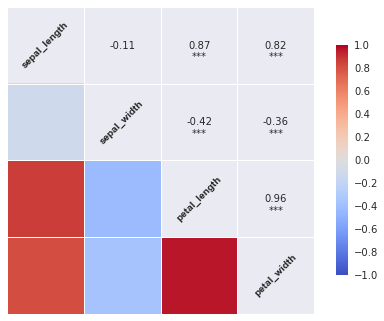

In [53]:
import seaborn as sns # just a conventional alias, don't know why
sns.corrplot(df) # compute and plot the pair-wise correlations

# Boxplot

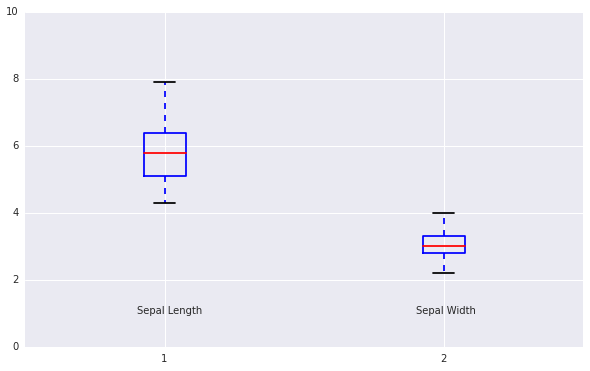

In [151]:
# Matplotlib

fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(111)
plt.boxplot( [df['sepal_length'], df['sepal_width'] ]);
plt.ylim(0,10)
plt.annotate("Sepal Length", xy=(0.9,1))
plt.annotate("Sepal Width", xy=(1.9,1))

array([<matplotlib.axes._subplots.AxesSubplot object at 0x121c0e470>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x121e59278>], dtype=object)

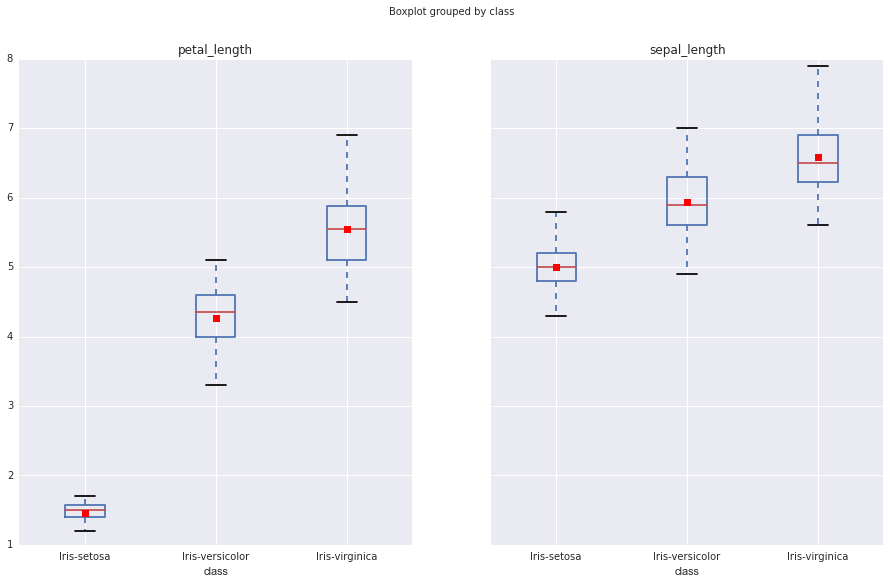

In [153]:
# Pandas
df.boxplot(column=['petal_length','sepal_length'], by='class', figsize= (15,9), showmeans=True);

# Petal Length very discriminative for Iris Setosa

# Histograms

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x122b0be48>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x121bfe860>]], dtype=object)

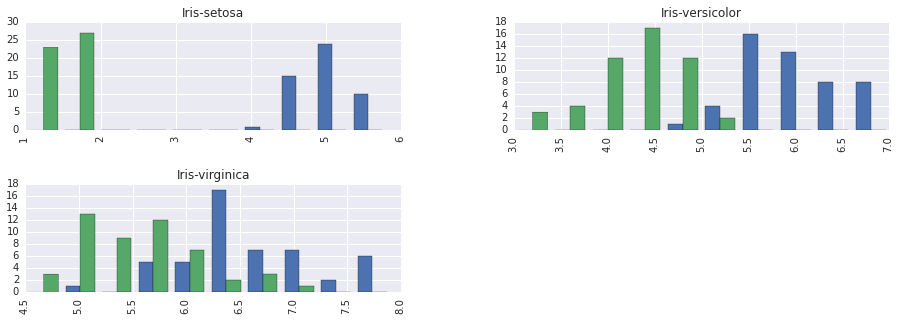

In [158]:
df[['sepal_length','petal_length', 'class']].hist( figsize= (15,5), by='class')

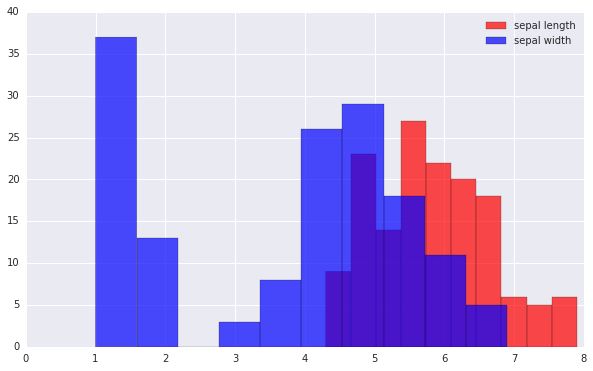

In [121]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.subplot(111)
plt.hist( df['sepal_length'], label = 'sepal length', color = 'r', alpha=0.7)
plt.hist( df['petal_length'], label = 'sepal width', color = 'b', alpha=0.7 )
plt.legend(loc='best')

# Quartiles, Boxplots and histograms


In [123]:
data = df.sepal_length

print(data.describe())


count    150.000000
mean       5.843333
std        0.828066
min        4.300000
25%        5.100000
50%        5.800000
75%        6.400000
max        7.900000
Name: sepal_length, dtype: float64


(array([  4.,   5.,   7.,  16.,   9.,   5.,  13.,  14.,  10.,  12.,   4.,
         16.,   7.,  11.,   5.,   1.,   4.,   1.,   5.,   1.]),
 array([ 4.3 ,  4.48,  4.66,  4.84,  5.02,  5.2 ,  5.38,  5.56,  5.74,
         5.92,  6.1 ,  6.28,  6.46,  6.64,  6.82,  7.  ,  7.18,  7.36,
         7.54,  7.72,  7.9 ]),
 <a list of 20 Patch objects>)

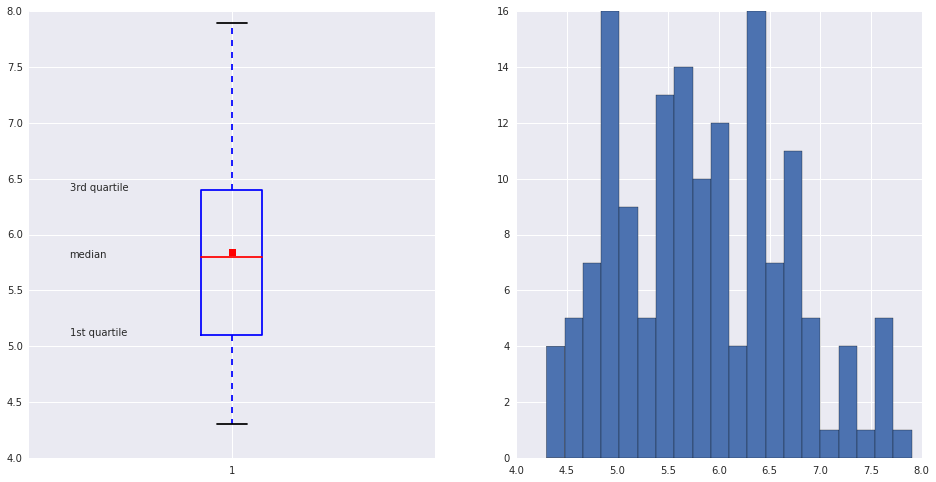

In [138]:
fig, ax = plt.subplots(figsize=(16, 8))
# Boxplot
plt.subplot(121)
plt.boxplot(data, showmeans=True)
plt.annotate('1st quartile', (0.6, 5.1))
plt.annotate('median', (0.6, 5.8))
plt.annotate('3rd quartile', (0.6, 6.4))
# Histogram
plt.subplot(122)
plt.hist(data, bins = 20)
